### Project Setup

Connecting google colab with drive and importing libraries & datasets



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import lib
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
from pandas.tseries.holiday import USFederalHolidayCalendar
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA


%matplotlib inline

### Importing and understanding datasets

Understanding the configuration of the dataset

In [5]:
# Import NYC taxi dataset
train_data = pd.read_csv('/content/drive/MyDrive/UrbComp/project/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/UrbComp/project/test.csv')

# Import Weather Dataset
weather_data = pd.read_csv('/content/drive/MyDrive/UrbComp/project/weather_data_nyc_centralpark_2016.csv') 

# Import Google Distance Dataset
distance_data = pd.read_csv('/content/drive/MyDrive/UrbComp/project/train_with_distance848k.csv')

In [6]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
train_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [8]:
train_data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [9]:
weather_data.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [10]:
weather_data.describe()

,maximum temperature,minimum temperature,average temperature
count,366.000000,366.000000,366.000000
mean,64.625683,49.806011,57.215847
std,18.041787,16.570747,17.124760
min,15.000000,-1.000000,7.000000
25%,50.000000,37.250000,44.000000
50%,64.500000,48.000000,55.750000
75%,81.000000,65.000000,73.500000
max,96.000000,81.000000,88.500000


In [11]:
weather_data.dtypes

date                    object
maximum temperature      int64
minimum temperature      int64
average temperature    float64
precipitation           object
snow fall               object
snow depth              object
dtype: object

In [12]:
distance_data.head()

,Unnamed: 0,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,dropoff_day,dropoff_hour,dropoff_dayofweek,duration_time,distance_m,distance_km,pickup_date_isHoliday,dropoff_date_isHoliday,pickup_combined,google_distance
0,0,id2875421,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,...,14,17,0,< 5,1502.171837,1.502172,False,False,23464.246452,2005.0
1,1,id2377394,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,...,12,0,6,< 5,1808.659969,1.808660,False,False,23458.961021,2515.0
2,2,id3858529,2,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,...,19,12,1,5-10,6379.687175,6.379687,False,False,23463.529976,9916.0
3,3,id3504673,2,1,-74.010040,40.719971,-74.012268,40.706718,N,429,...,6,19,2,< 5,1483.632481,1.483632,False,False,23455.584686,1779.0
4,4,id2181028,2,1,-73.973053,40.793209,-73.972923,40.782520,N,435,...,26,13,5,< 5,1187.037659,1.187038,False,False,23468.804581,1607.0


In [13]:
distance_data.describe()

,Unnamed: 0,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_dayofweek,pickup_year,...,pickup_hour,dropoff_year,dropoff_month,dropoff_day,dropoff_hour,dropoff_dayofweek,distance_m,distance_km,pickup_combined,google_distance
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644.0,...,1.458644e+06,1458644.0,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.307171e+06
mean,7.293215e+05,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.050375e+00,2016.0,...,1.360648e+01,2016.0,3.517178e+00,1.550448e+01,1.359890e+01,3.050375e+00,3.442193e+03,3.442193e+00,2.346119e+04,3.852857e+03
std,4.210744e+05,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,1.954039e+00,0.0,...,6.399693e+00,0.0,1.681217e+00,8.703123e+00,6.483682e+00,1.954039e+00,4.300259e+03,4.300259e+00,5.920638e+00,4.946200e+03
min,0.000000e+00,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00,2016.0,...,0.000000e+00,2016.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.231890e+04,0.000000e+00
25%,3.646608e+05,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.000000e+00,2016.0,...,9.000000e+00,2016.0,2.000000e+00,8.000000e+00,9.000000e+00,1.000000e+00,1.232265e+03,1.232265e+00,2.345873e+04,2.005000e+03
50%,7.293215e+05,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,3.000000e+00,2016.0,...,1.400000e+01,2016.0,4.000000e+00,1.500000e+01,1.400000e+01,3.000000e+00,2.094045e+03,2.094045e+00,2.346176e+04,2.005000e+03
75%,1.093982e+06,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,5.000000e+00,2016.0,...,1.900000e+01,2016.0,5.000000e+00,2.300000e+01,1.900000e+01,5.000000e+00,3.874716e+03,3.874716e+00,2.346433e+04,3.552000e+03
max,1.458643e+06,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,6.000000e+00,2016.0,...,2.300000e+01,2016.0,7.000000e+00,3.100000e+01,2.300000e+01,6.000000e+00,1.240510e+06,1.240510e+03,2.546579e+04,6.776010e+05


In [14]:
distance_data.dtypes

Unnamed: 0                  int64
id                         object
vendor_id                   int64
passenger_count             int64
pickup_longitude          float64
pickup_latitude           float64
dropoff_longitude         float64
dropoff_latitude          float64
store_and_fwd_flag         object
trip_duration               int64
pickup_date                object
pickup_dayofweek            int64
pickup_year                 int64
pickup_month                int64
pickup_day                  int64
pickup_hour                 int64
dropoff_date               object
dropoff_year                int64
dropoff_month               int64
dropoff_day                 int64
dropoff_hour                int64
dropoff_dayofweek           int64
duration_time              object
distance_m                float64
distance_km               float64
pickup_date_isHoliday        bool
dropoff_date_isHoliday       bool
pickup_combined           float64
google_distance           float64
dtype: object

### Data Preprocessing

Converting the data to appropriate standards, handling null values, removing outliers and redundant data

In [15]:
# Remove Null data
train_data[train_data.isna().any(axis=1)]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration


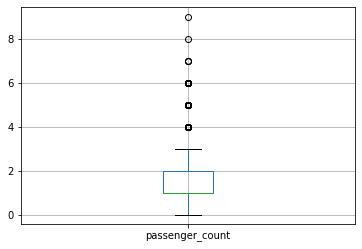

In [16]:
# Analysing passenger count to remove outliers
train_data.boxplot(column=['passenger_count']) 

In [17]:
train_data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [18]:
# Assuming a cab cannot fit more than 6 people, we remove the data with passenger count greater than 6. 
# Also it doesn't make sense when the passenger count is 0
index = train_data[ (train_data['passenger_count'] > 6)  | (train_data['passenger_count'] == 0)].index
train_data.drop(index , inplace=True)

In [19]:
# Converting categorical data to numerical
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].map(lambda x: 0 if x == 'N' else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].map(lambda x: 0 if x == 'N' else 1)

In [20]:
# Converting data to pandas standards
train_data['pickup_datetime'] = pd.to_datetime(train_data.pickup_datetime)
train_data.loc[:, 'pickup_date'] = train_data['pickup_datetime'].dt.date
train_data.loc[:, 'pickup_time'] = train_data['pickup_datetime'].dt.time
train_data['dropoff_datetime'] = pd.to_datetime(train_data.dropoff_datetime)
train_data.loc[:, 'dropoff_date'] = train_data['dropoff_datetime'].dt.date
train_data.loc[:, 'dropoff_time'] = train_data['dropoff_datetime'].dt.time
train_data.loc[:, 'dropoff_hour'] = train_data['dropoff_datetime'].dt.hour
train_data.loc[:, 'dropoff_weekday'] = train_data['dropoff_datetime'].dt.weekday
train_data.loc[:, 'dropoff_month'] = train_data['dropoff_datetime'].dt.month
train_data.loc[:, 'pickup_weekday'] = train_data['pickup_datetime'].dt.weekday
train_data.loc[:, 'pickup_weekofyear'] = train_data['pickup_datetime'].dt.weekofyear
train_data.loc[:, 'pickup_hour'] = train_data['pickup_datetime'].dt.hour
train_data.loc[:, 'pickup_minute'] = train_data['pickup_datetime'].dt.minute
train_data.loc[:, 'pickup_dt'] = (train_data['pickup_datetime'] - train_data['pickup_datetime'].min()).dt.total_seconds()
train_data.loc[:, 'pickup_week_hour'] = train_data['pickup_weekday'] * 24 + train_data['pickup_hour']
train_data.loc[:, 'pickup_dayofyear'] = train_data['pickup_datetime'].dt.dayofyear
train_data.loc[:, 'pickup_month'] = train_data['pickup_datetime'].dt.month

test_data['pickup_datetime'] = pd.to_datetime(test_data.pickup_datetime)
test_data.loc[:, 'pickup_date'] = test_data['pickup_datetime'].dt.date
test_data.loc[:, 'pickup_time'] = test_data['pickup_datetime'].dt.time
test_data.loc[:, 'pickup_weekday'] = test_data['pickup_datetime'].dt.weekday
test_data.loc[:, 'pickup_weekofyear'] = test_data['pickup_datetime'].dt.weekofyear
test_data.loc[:, 'pickup_hour'] = test_data['pickup_datetime'].dt.hour
test_data.loc[:, 'pickup_minute'] = test_data['pickup_datetime'].dt.minute
test_data.loc[:, 'pickup_dt'] = (test_data['pickup_datetime'] - test_data['pickup_datetime'].min()).dt.total_seconds()
test_data.loc[:, 'pickup_week_hour'] = test_data['pickup_weekday'] * 24 + test_data['pickup_hour']
test_data.loc[:, 'pickup_dayofyear'] = test_data['pickup_datetime'].dt.dayofyear
test_data.loc[:, 'pickup_month'] = test_data['pickup_datetime'].dt.month

<ipython-input-20-030e7b597f1d>:12: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train_data.loc[:, 'pickup_weekofyear'] = train_data['pickup_datetime'].dt.weekofyear
<ipython-input-20-030e7b597f1d>:24: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test_data.loc[:, 'pickup_weekofyear'] = test_data['pickup_datetime'].dt.weekofyear


In [21]:
weather_data.loc[weather_data['precipitation']== 'T', 'precipitation'] = '0.00'
weather_data['precipitation'] = (weather_data['precipitation']).astype(float)

weather_data.loc[weather_data['snow fall']== 'T', 'snow fall'] = '0.00'
weather_data['snow fall'] = (weather_data['snow fall']).astype(float)

weather_data.loc[weather_data['snow depth']== 'T', 'snow depth'] = '0.00'
weather_data['snow depth'] = (weather_data['snow depth']).astype(float)

weather_data['date'] = pd.to_datetime(weather_data.date)
weather_data['weather_dayofyear']= weather_data.date.dt.dayofyear

### Accounting for holidays

The traffic flows different during the holidays which affect the taxi trip duration. Instead of removing it as an outlier, we want to anaylyse and take into consideration

In [22]:
# Identifying the holidays, because it'll have a different behaviour than usual
holiday_calendar = USFederalHolidayCalendar()
holidays = holiday_calendar.holidays()

train_data['pickup_holiday'] = pd.to_datetime(train_data.pickup_datetime.dt.date).isin(holidays)
train_data['pickup_holiday'] = train_data.pickup_holiday.map(lambda x: 1 if x == True else 0)
train_data['pickup_near_holiday'] = (pd.to_datetime(train_data.pickup_datetime.dt.date).isin(holidays + timedelta(days=1)) | pd.to_datetime(train_data.pickup_datetime.dt.date).isin(holidays - timedelta(days=1)))
train_data['pickup_near_holiday'] = train_data.pickup_near_holiday.map(lambda x: 1 if x == True else 0)

test_data['pickup_holiday'] = pd.to_datetime(test_data.pickup_datetime.dt.date).isin(holidays)
test_data['pickup_holiday'] = test_data.pickup_holiday.map(lambda x: 1 if x == True else 0)
test_data['pickup_near_holiday'] = (pd.to_datetime(test_data.pickup_datetime.dt.date).isin(holidays + timedelta(days=1)) | pd.to_datetime(test_data.pickup_datetime.dt.date).isin(holidays - timedelta(days=1)))
test_data['pickup_near_holiday'] = test_data.pickup_near_holiday.map(lambda x: 1 if x == True else 0)

In [23]:
google_distance_data = distance_data[:848000]['google_distance']
print(distance_data)

         Unnamed: 0         id  vendor_id  passenger_count  pickup_longitude  \
0                 0  id2875421          2                1        -73.982155   
1                 1  id2377394          1                1        -73.980415   
2                 2  id3858529          2                1        -73.979027   
3                 3  id3504673          2                1        -74.010040   
4                 4  id2181028          2                1        -73.973053   
...             ...        ...        ...              ...               ...   
1458639     1458639  id2376096          2                4        -73.982201   
1458640     1458640  id1049543          1                1        -74.000946   
1458641     1458641  id2304944          2                1        -73.959129   
1458642     1458642  id2714485          1                1        -73.982079   
1458643     1458643  id1209952          1                1        -73.979538   

         pickup_latitude  dropoff_longi

# Data Visualization

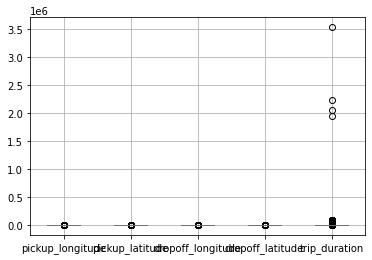

In [24]:
# Visualzing boxplots of trip parameters
train_data.boxplot(column=['pickup_longitude',	'pickup_latitude',	'dropoff_longitude',	'dropoff_latitude',	'trip_duration'])

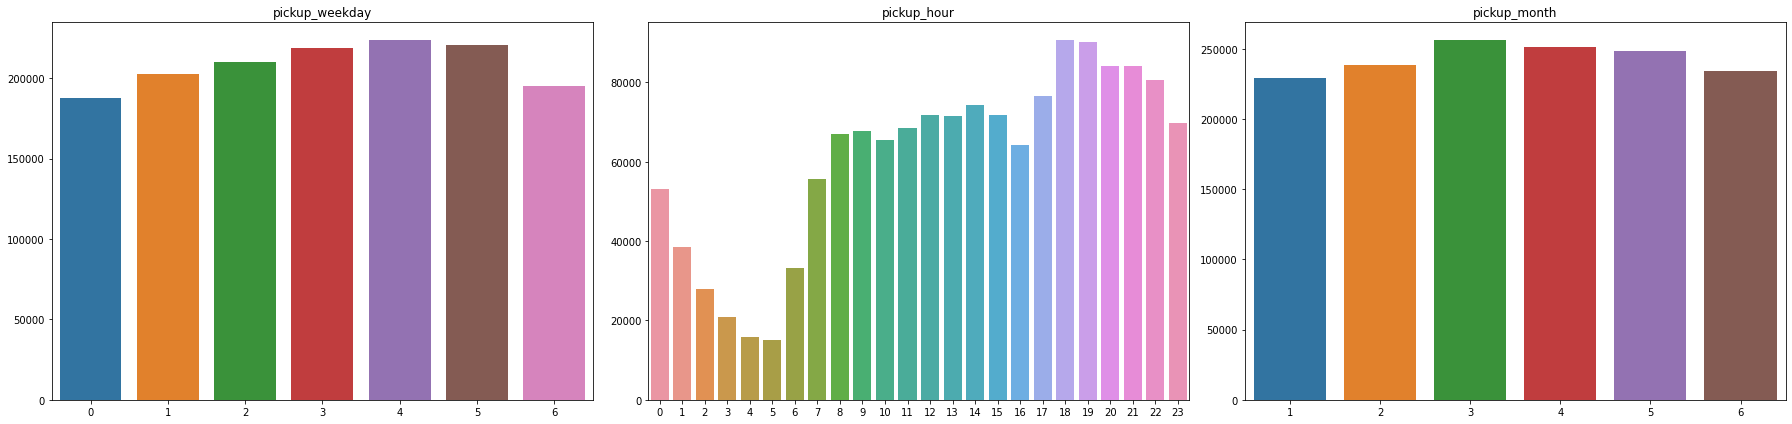

In [25]:
# Visualize pickup day, hour and month
fig, sub = plt.subplots(1,3,figsize=(25,6))

for col, subplot in zip(["pickup_weekday","pickup_hour", "pickup_month"], sub.flatten()):
    
      sns.barplot(x=train_data[col].value_counts().index, y = train_data[col].value_counts().values, ax= subplot)
      subplot.set_title(col)
    
fig.tight_layout()

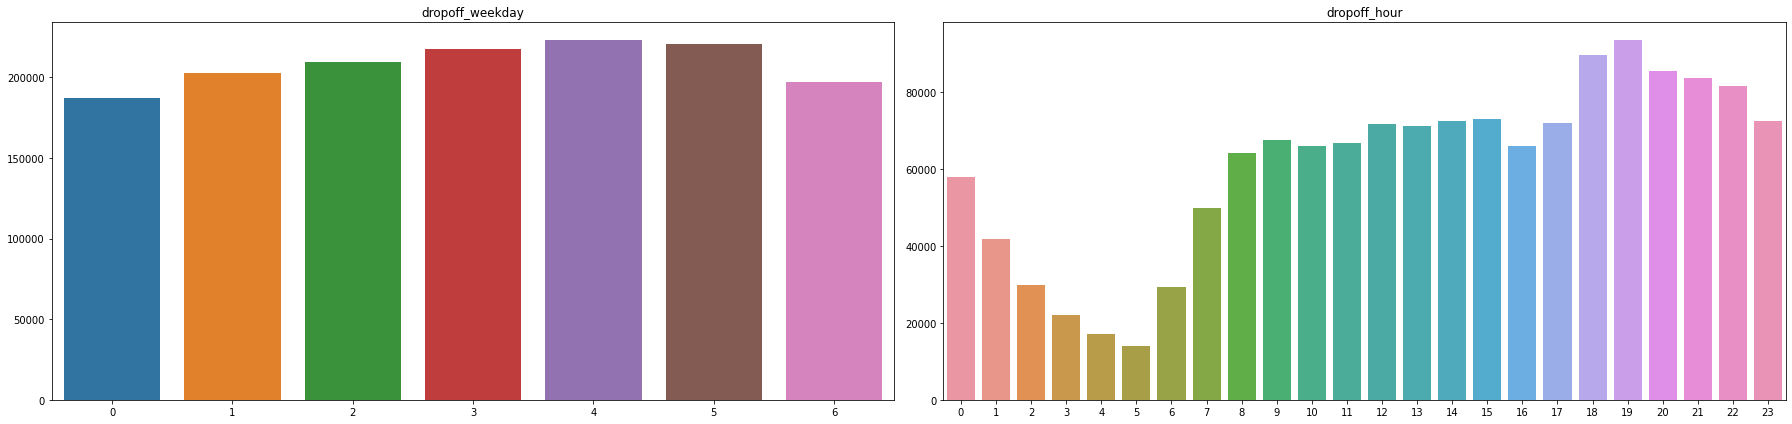

In [26]:
# Visualize dropoff day and hour
fig, sub = plt.subplots(1,2,figsize=(25,6))

for col, subplot in zip(["dropoff_weekday","dropoff_hour"], sub.flatten()):
    
      sns.barplot(x=train_data[col].value_counts().index, y = train_data[col].value_counts().values, ax= subplot)
      subplot.set_title(col) 

fig.tight_layout()

[Text(0, 0.5, 'Number of Trips'), Text(0.5, 0, 'Trip duration')]

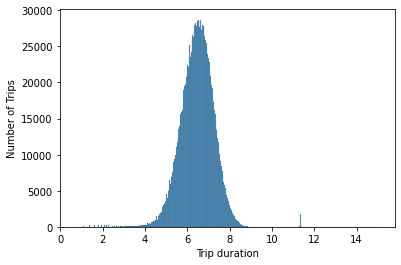

In [27]:
# Visualise Trip Duration

train_data['trip_duration_normalised'] = np.log(train_data['trip_duration'].values + 1)
graph = sns.histplot(train_data["trip_duration_normalised"], bins = 400)
graph.set(xlabel='Trip duration', ylabel='Number of Trips')

In [28]:
# Visualise number of trips

fig = go.Figure()
pickup_date_count = pd.DataFrame(train_data.groupby('pickup_date').count()[['id']])
pickup_date_count.index.name = 'Pickup Dates'
pickup_date_count.reset_index(inplace=True)


fig.add_trace(go.Scatter(x=pickup_date_count['Pickup Dates'], y=pickup_date_count['id']))
fig.update_yaxes(title_text="Count of Trips")

# Data Correlation

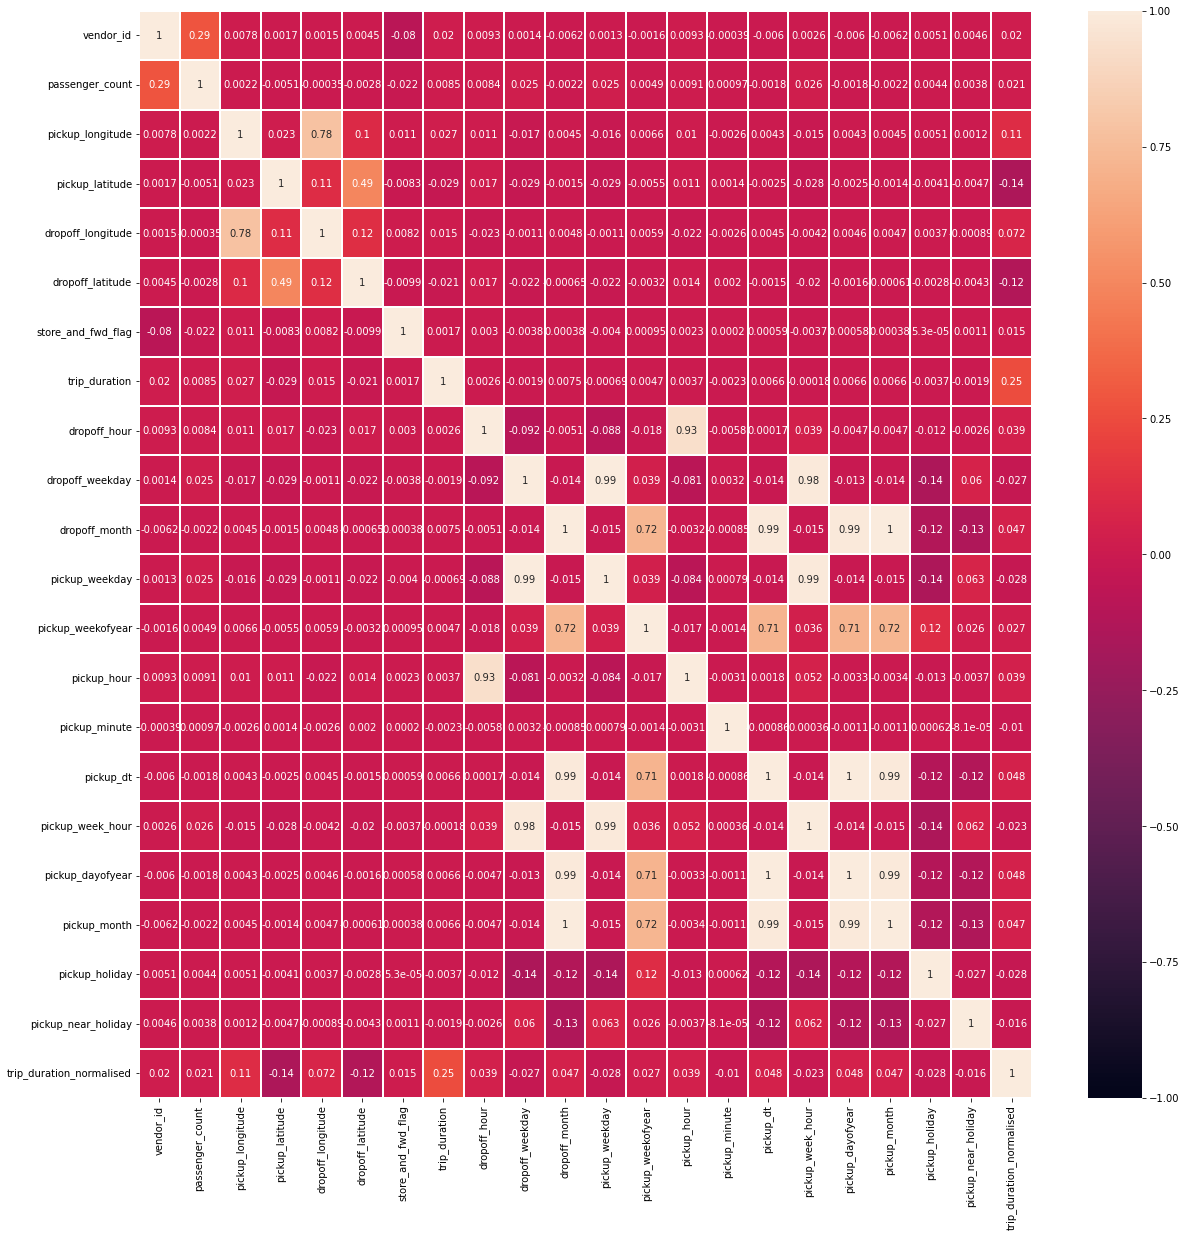

In [29]:
# Heap Map
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sns.heatmap(train_data.corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True)
f.set_figwidth(20)

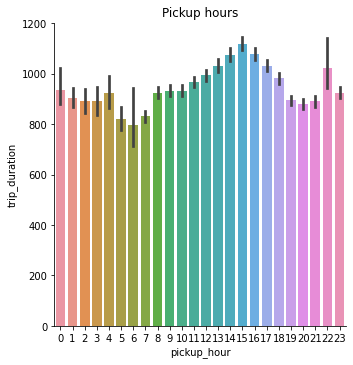

In [30]:
# Correlation bewteen Trip Duration and Time of Day

ax=sns.catplot(x="pickup_hour", y="trip_duration",kind="bar",data=train_data)
plt.title('Pickup hours')
plt.show()

### Analyzing the imapact of weather

Weather can be a cruicial factor when it comes to anazlying the impact of taxi trip duration

In [31]:
# Merge NYC taxi dataset with the weather dataset through date column
train_data['date'] = train_data['pickup_datetime'].dt.date
train_data['date'] = pd.to_datetime(train_data['date'])
weather = weather_data[['date','minimum temperature', 'precipitation', 'snow fall', 'snow depth']]
train_data = train_data.merge(weather, how='left', left_on='date', right_on='date')

test_data['date'] = test_data['pickup_datetime'].dt.date
test_data['date'] = pd.to_datetime(test_data['date'])
test_data = test_data.merge(weather, how='left', left_on='date', right_on='date')

### PCA

We need to reduce the dimensionality of the dataset using PCA in order to yeild better result and reduce the training time

In [32]:
trip_params = np.vstack((train_data[['pickup_latitude', 'pickup_longitude']].values, train_data[['dropoff_latitude', 'dropoff_longitude']].values, test_data[['pickup_latitude', 'pickup_longitude']].values, test_data[['dropoff_latitude', 'dropoff_longitude']].values))
pca = PCA().fit(trip_params) 

In [33]:
train_data['pickup_pca0'] = pca.transform(train_data[['pickup_latitude', 'pickup_longitude']])[:, 0] 
train_data['pickup_pca1'] = pca.transform(train_data[['pickup_latitude', 'pickup_longitude']])[:, 1] 
train_data['dropoff_pca0'] = pca.transform(train_data[['dropoff_latitude', 'dropoff_longitude']])[:, 0] 
train_data['dropoff_pca1'] = pca.transform(train_data[['dropoff_latitude', 'dropoff_longitude']])[:, 1] 
test_data['pickup_pca0'] = pca.transform(test_data[['pickup_latitude', 'pickup_longitude']])[:, 0] 
test_data['pickup_pca1'] = pca.transform(test_data[['pickup_latitude', 'pickup_longitude']])[:, 1] 
test_data['dropoff_pca0'] = pca.transform(test_data[['dropoff_latitude', 'dropoff_longitude']])[:, 0] 
test_data['dropoff_pca1'] = pca.transform(test_data[['dropoff_latitude', 'dropoff_longitude']])[:, 1]

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but PCA was fitted without feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but PCA was fitted without feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but PCA was fitted without feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but PCA was fitted without feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but PCA was fitted without feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but PCA was fitted without feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but PCA was fitted without feature names

/usr/local/lib/python3.8/dist-packages/sk

# CLUSTERING

In [34]:
sample_ind = np.random.permutation(len(trip_params))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(trip_params[sample_ind])

In [35]:
train_data.loc[:, 'pickup_cluster'] = kmeans.predict(train_data[['pickup_latitude', 'pickup_longitude']])
train_data.loc[:, 'dropoff_cluster'] = kmeans.predict(train_data[['dropoff_latitude', 'dropoff_longitude']])
test_data.loc[:, 'pickup_cluster'] = kmeans.predict(test_data[['pickup_latitude', 'pickup_longitude']])
test_data.loc[:, 'dropoff_cluster'] = kmeans.predict(test_data[['dropoff_latitude', 'dropoff_longitude']])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but MiniBatchKMeans was fitted without feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but MiniBatchKMeans was fitted without feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but MiniBatchKMeans was fitted without feature names

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but MiniBatchKMeans was fitted without feature names



# Model Training and Evaluation

In [36]:
# Listing out the features that should be used for training the XGB Model.

features = list(train_data.columns)
features = [f for f in train_data.columns if f not in ['id', 'trip_duration_normalised', 'trip_duration', 'dropoff_datetime','dropoff_date','dropoff_hour',
                           'dropoff_month','dropoff_time','dropoff_weekday', 'pickup_date', 'pickup_datetime', 'date','pickup_time','pickup_month']]
train_data[features].count()

vendor_id              1458579
passenger_count        1458579
pickup_longitude       1458579
pickup_latitude        1458579
dropoff_longitude      1458579
dropoff_latitude       1458579
store_and_fwd_flag     1458579
pickup_weekday         1458579
pickup_weekofyear      1458579
pickup_hour            1458579
pickup_minute          1458579
pickup_dt              1458579
pickup_week_hour       1458579
pickup_dayofyear       1458579
pickup_holiday         1458579
pickup_near_holiday    1458579
minimum temperature    1458579
precipitation          1458579
snow fall              1458579
snow depth             1458579
pickup_pca0            1458579
pickup_pca1            1458579
dropoff_pca0           1458579
dropoff_pca1           1458579
pickup_cluster         1458579
dropoff_cluster        1458579
dtype: int64

In [37]:
# Performing k-fold splits

X = train_data[features].values
y = np.log(train_data['trip_duration'].values + 1)  
kf = KFold(n_splits=10)
kf.get_n_splits(X)

print(kf)  

KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=10, random_state=None, shuffle=False)
TRAIN: [ 145858  145859  145860 ... 1458576 1458577 1458578] TEST: [     0      1      2 ... 145855 145856 145857]
TRAIN: [      0       1       2 ... 1458576 1458577 1458578] TEST: [145858 145859 145860 ... 291713 291714 291715]
TRAIN: [      0       1       2 ... 1458576 1458577 1458578] TEST: [291716 291717 291718 ... 437571 437572 437573]
TRAIN: [      0       1       2 ... 1458576 1458577 1458578] TEST: [437574 437575 437576 ... 583429 583430 583431]
TRAIN: [      0       1       2 ... 1458576 1458577 1458578] TEST: [583432 583433 583434 ... 729287 729288 729289]
TRAIN: [      0       1       2 ... 1458576 1458577 1458578] TEST: [729290 729291 729292 ... 875145 875146 875147]
TRAIN: [      0       1       2 ... 1458576 1458577 1458578] TEST: [ 875148  875149  875150 ... 1021003 1021004 1021005]
TRAIN: [      0       1       2 ... 1458576 1458577 1458578] TEST: [1021006 1021007 1021008 ... 1166861 1166862 1166863]
TRAIN: [      0

In [38]:
# Setting the XGB Parameters
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)
dtest = xgb.DMatrix(test_data[features].values)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

xgb_parameters = {'min_child_weight': 10, 'eta': 0.04, 'colsample_bytree': 0.8, 'max_depth': 15,
            'subsample': 0.75, 'lambda': 2, 'nthread': -1, 'booster' : 'gbtree', 'silent': 1, 'gamma' : 0,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}

In [ ]:
# Training the model

model = xgb.train(xgb_parameters, dtrain, 750, watchlist, early_stopping_rounds=250, maximize=False, verbose_eval=15)

[0]	train-rmse:5.78112	valid-rmse:5.7822
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 250 rounds.
[15]	train-rmse:3.16742	valid-rmse:3.16874
[30]	train-rmse:1.77055	valid-rmse:1.77287
[45]	train-rmse:1.0428	valid-rmse:1.04756
[60]	train-rmse:0.683886	valid-rmse:0.693285
[75]	train-rmse:0.520311	valid-rmse:0.536374
[90]	train-rmse:0.452487	valid-rmse:0.474757
[105]	train-rmse:0.420392	valid-rmse:0.448394
[120]	train-rmse:0.402726	valid-rmse:0.435886
[135]	train-rmse:0.390345	valid-rmse:0.427868
[150]	train-rmse:0.380435	valid-rmse:0.422523
[165]	train-rmse:0.372653	valid-rmse:0.418577
[180]	train-rmse:0.364608	valid-rmse:0.41479
[195]	train-rmse:0.356231	valid-rmse:0.410457
[210]	train-rmse:0.353495	valid-rmse:0.409273
[225]	train-rmse:0.347131	valid-rmse:0.405911
[240]	train-rmse:0.343418	valid-rmse:0.404273
[255]	train-rmse:0.340603	valid-rmse:0.403377
[270]	train-rmse:0.337578	valid-rmse:0.402035

In [ ]:
# Predicting the model on test data

y_test = model.predict(dtest)
y_pred = model.predict(dvalid)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y)

In [ ]:
# Check the number of rows of test data to be matching with predicted data.
if test_data.shape[0] == y_test.shape[0]:
  print('Number of rows for test data and predicted data are same')  
else:
  print('Error in Test Data Format')

# Convert predicted dataframe into a csv file for submission
test_data['trip_duration'] = np.exp(y_test) - 1
test_data[['id', 'trip_duration']].to_csv('final_submission.csv', index=False)

# Plot validation and test prediction mean
print('Valid prediction mean: %.3f' % y_pred.mean())
print('Test prediction mean: %.3f' % y_test.mean())
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
sns.distplot(y_pred, ax=ax[0], color='red', label='validation prediction')
sns.distplot(y_test, ax=ax[1], color='blue', label='test prediction')
ax[0].legend(loc=0)
ax[1].legend(loc=0)
plt.show()